Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

Data Collection and Processing

In [6]:
# loading the csv data to a Pandas DataFrame
# heart_data = pd.read_csv('/content/heart1.csv')
heart_data = pd.read_csv('heart1.csv')

In [7]:
# print first 5 rows of the dataset
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# New Section

In [8]:
# print last 5 rows of the dataset
heart_data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [9]:
# number of rows and columns in the dataset
heart_data.shape

(918, 12)

In [10]:
heart_data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [11]:
string_col = heart_data.select_dtypes(include="object").columns
heart_data[string_col]=heart_data[string_col].astype("string")

In [12]:
heart_data.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In [13]:
string_col=heart_data.select_dtypes("string").columns.to_list()

In [14]:
num_col=heart_data.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [15]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
heart_data.describe().T
heart_data[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(heart_data[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [18]:
heart_data = heart_data.apply(LabelEncoder().fit_transform)
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [19]:
heart_data[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(heart_data[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
1    725
0    193
Name: count, dtype: int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
0    496
2    203
1    173
3     46
Name: count, dtype: int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
1    552
0    188
2    178
Name: count, dtype: int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
0    547
1    371
Name: count, dtype: int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
1    460
2    395
0     63
Name: count, dtype: int64


In [20]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [21]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int32
 2   ChestPainType   918 non-null    int32
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int32
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int32
 9   Oldpeak         918 non-null    int64
 10  ST_Slope        918 non-null    int32
 11  HeartDisease    918 non-null    int64
dtypes: int32(5), int64(7)
memory usage: 68.3 KB


In [22]:
# checking for missing values
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [23]:
# statistical measures about the data
heart_data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,25.510893,0.789760,0.781046,32.899782,81.640523,0.233115,0.989107,62.979303,0.404139,18.787582,1.361656,0.553377
std,9.432617,0.407701,0.956519,14.098608,58.742803,0.423046,0.631671,24.919644,0.490992,10.077647,0.607056,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,0.000000,22.000000,33.250000,0.000000,1.000000,46.000000,0.000000,10.000000,1.000000,0.000000
50%,26.000000,1.000000,0.000000,31.000000,81.000000,0.000000,1.000000,64.000000,0.000000,16.000000,1.000000,1.000000
75%,32.000000,1.000000,2.000000,41.000000,125.000000,0.000000,1.000000,82.000000,1.000000,25.000000,2.000000,1.000000
max,49.000000,1.000000,3.000000,66.000000,221.000000,1.000000,2.000000,118.000000,1.000000,52.000000,2.000000,1.000000


In [24]:
# checking the distribution of Target Variable
heart_data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [25]:
X = heart_data.drop(columns='HeartDisease', axis=1)
Y = heart_data['HeartDisease']

In [26]:
print(X)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     12    1              1         41          147          0           1   
1     21    0              2         55           40          0           1   
2      9    1              1         31          141          0           2   
3     20    0              0         39           72          0           1   
4     26    1              2         49           53          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   17    1              3         14          122          0           1   
914   40    1              0         45           51          1           1   
915   29    1              0         31            9          0           1   
916   29    0              1         31           94          0           0   
917   10    1              2         39           35          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [27]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


Splitting the Data into Training data & Test Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(918, 11) (734, 11) (184, 11)


Model Training

Logistic Regression

In [30]:
model = LogisticRegression()

In [31]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

d:\Desktop\b-tech-project\btech-project-backend\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [32]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [33]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8474114441416893


In [34]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [35]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.842391304347826


In [36]:
import pickle
with open('heart.pkl', 'wb') as file:
    pickle.dump(model, file)

K-NN

In [37]:
from sklearn.neighbors import KNeighborsClassifier


In [38]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()  # get an instance of the model


In [39]:
model2.fit(X_train, Y_train) # Train/Fit model

KNeighborsClassifier()

In [40]:
# accuracy on training data
X_train_prediction2 = model2.predict(X_train)
training_data_accuracy2 = accuracy_score(X_train_prediction2, Y_train)

In [41]:
print('Accuracy on Training data : ', training_data_accuracy2)

Accuracy on Training data :  0.8174386920980926


In [42]:
# accuracy on test data
X_test_prediction2 = model2.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction2, Y_test)

In [43]:
print('Accuracy on Test data : ', test_data_accuracy2)

Accuracy on Test data :  0.7445652173913043


Support Vector Machine (SVM)

In [44]:
from sklearn.metrics import classification_report

from sklearn.svm import SVC

In [45]:
model3 = SVC(random_state=1)

In [46]:
model3.fit(X_train, Y_train)

SVC(random_state=1)

In [47]:
# accuracy on training data
X_train_prediction3 = model3.predict(X_train)
training_data_accuracy3 = accuracy_score(X_train_prediction3, Y_train)

In [48]:
print('Accuracy on Training data : ', training_data_accuracy3)

Accuracy on Training data :  0.779291553133515


In [49]:
# accuracy on test data
X_test_prediction3 = model3.predict(X_test)
test_data_accuracy3 = accuracy_score(X_test_prediction3, Y_test)

In [50]:
print('Accuracy on Test data : ', test_data_accuracy3)

Accuracy on Test data :  0.7934782608695652


4th Model: Naive Bayes Classifier

In [51]:
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB

In [52]:
model4 = GaussianNB()

In [53]:
model4.fit(X_train, Y_train)

GaussianNB()

In [54]:
# accuracy on training data
X_train_prediction4 = model4.predict(X_train)
training_data_accuracy4 = accuracy_score(X_train_prediction4, Y_train)

In [55]:
print('Accuracy on Training data : ', training_data_accuracy4)

Accuracy on Training data :  0.8501362397820164


In [56]:
# accuracy on test data
X_test_prediction4 = model4.predict(X_test)
test_data_accuracy4 = accuracy_score(X_test_prediction4, Y_test)

In [57]:
print('Accuracy on Test data : ', test_data_accuracy4)

Accuracy on Test data :  0.8369565217391305


Random Forest

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [60]:
model5 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=1)

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=2)

In [62]:
model5.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features=1, min_samples_leaf=2,
                       min_samples_split=5)

In [63]:
X_train_prediction5 = model5.predict(X_train)
training_data_accuracy5 = accuracy_score(X_train_prediction5, Y_train)

In [64]:
print('Accuracy on Training data : ', training_data_accuracy5)

Accuracy on Training data :  0.9373297002724795


In [65]:
# accuracy on test data
X_test_prediction5 = model5.predict(X_test)
test_data_accuracy5 = accuracy_score(X_test_prediction5, Y_test)

In [66]:
print('Accuracy on Test data : ', test_data_accuracy4)

Accuracy on Test data :  0.8369565217391305


6th Model: XGBoost

In [67]:
from xgboost import XGBClassifier

model6 = XGBClassifier(random_state=1)

In [68]:
model6 = XGBClassifier(random_state=1, max_depth=3, learning_rate=0.1, n_estimators=100, min_child_weight=1, gamma=0, reg_alpha=0)

In [69]:
from sklearn.model_selection import cross_val_score

cross_val_results = cross_val_score(model6, X_train, Y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cross_val_results.mean():.4f} +/- {cross_val_results.std():.4f}')

Cross-Validation Accuracy: 0.8542 +/- 0.0179


In [70]:
model6.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [71]:
X_train_prediction6 = model6.predict(X_train)
training_data_accuracy6 = accuracy_score(X_train_prediction6, Y_train)

In [72]:
print('Accuracy on Training data : ', training_data_accuracy6)

Accuracy on Training data :  0.9264305177111717


In [73]:
# accuracy on test data
X_test_prediction6 = model6.predict(X_test)
test_data_accuracy6 = accuracy_score(X_test_prediction6, Y_test)

In [74]:
print('Accuracy on Test data : ', test_data_accuracy4)

Accuracy on Test data :  0.8369565217391305


In [85]:
import pickle
with open('model6.pkl', 'wb') as file:
    pickle.dump(model6, file)

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

Matplotlib is building the font cache; this may take a moment.


In [81]:
class perceptron:

  def __init__(self):
    self.b = None
    self.w = None

  def model(self, x):
    return (np.dot(self.w, x) >= self.b)

  def predict(self, X):

    Y_pred = list()
    for x in X:
      y_pred = self.model(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  # def save_best_model(self, filename='perceptron_model.pkl'):
  #       with open(filename, 'wb') as file:
  #           pickle.dump(self, file)

  def fit(self, X, Y,epochs = 3, lr = 1):

    self.w = np.ones(X.shape[1])
    self.b = 0
    max_accuracy = 0

    accuracy = dict()

    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)

        if y == 1 and y_pred == 0:
          self.w += lr * x
          self.b += lr * 1
        if y == 0 and y_pred == 1:
          self.w -= lr * x
          self.b -= lr * 1

      accuracy[i] = accuracy_score(self.predict(X), Y)
      if(max_accuracy < accuracy[i]):
        # self.save_best_model()
        max_accuracy = accuracy[i]
        chkp_w = self.w
        chkp_b = self.b
    self.w = chkp_w
    self.b = chkp_b

    plt.plot(accuracy.values())
    plt.ylim([0,1])
    plt.show()

    print('Maximum Accuracy: ',max_accuracy)


In [82]:
pc = perceptron()

In [83]:
X_train = X_train.values
Y_train = Y_train.values

In [84]:
pc.fit(X_train, Y_train,50000, 0.001)

KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pickle

class Perceptron:
    def __init__(self):
        self.b = None
        self.w = None

    def model(self, x):
        return np.dot(self.w, x) >= self.b

    def predict(self, X):
        Y_pred = [self.model(x) for x in X]
        return np.array(Y_pred)

    def fit(self, X, Y, epochs=3, lr=1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        max_accuracy = 0

        accuracy = dict()

        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)

                if y == 1 and y_pred == 0:
                    self.w += lr * x
                    self.b += lr * 1
                if y == 0 and y_pred == 1:
                    self.w -= lr * x
                    self.b -= lr * 1

            accuracy[i] = accuracy_score(self.predict(X), Y)
            if max_accuracy < accuracy[i]:
                max_accuracy = accuracy[i]
                self.save_best_model()

        plt.plot(accuracy.values())
        plt.ylim([0, 1])
        plt.show()

        print('Maximum Accuracy:', max_accuracy)

    def save_best_model(self):
        self.saved_w = np.copy(self.w)
        self.saved_b = self.b
        with open("filename.pkl", 'wb') as file:
            pickle.dump(self, file)

    def get_best_model(self):
        return self.saved_w, self.saved_b


In [ ]:
import numpy as np
with open('filename.pkl', 'rb') as file:
    loaded_classifier = pickle.load(file)

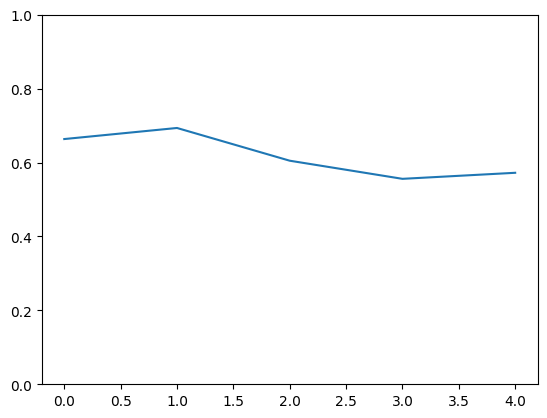

Maximum Accuracy: 0.6934604904632152


In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train, epochs=5, lr=0.1)

best_w, best_b = perceptron.get_best_model()
# Now 'best_w' and 'best_b' contain the weights and bias of the model with maximum accuracy.
